# <font color= #2E9AFE> Tema: Modelos basados en Árboles Parte II</font>

### Bosques Aleatorios

"Los árboles tienen un sólo aspecto que previene que sean la herramienta ideal para el aprendizaje predictivo, que es la **inexactitud**" 

Pasos para crear un bosque aleatorio:
- Crear un dataset "bootstrapped"
- Crear un árbol de decisión usando el dataset "bootstrapped", pero sólo usar un subconjunto aleatorio de variables (o columnas) en cada paso. 
- Regresar al paso 1. y repetir 

Gracias al proceso de bootstrapping, el requerimento de dividir los datos en prueba y entrenamiento no es tan estricto. Se recomienda dividir los datos en prueba y entrenamiento cuando se quiere comparar su desempeño contra otros modelos. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time

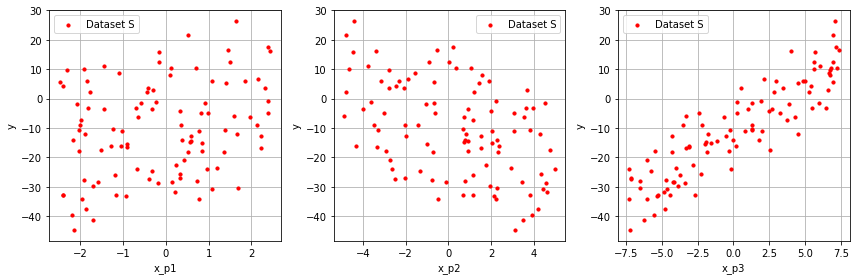

In [2]:
#Generar datos
rng = np.random.RandomState(0)

# #############################################################################
X = np.zeros((100,3))
X[:,0] = 5 * rng.rand(100, 1)[:,0]-2.5
X[:,1] = 10 * rng.rand(100, 1)[:,0]-5
X[:,2] = 15 * rng.rand(100, 1)[:,0]-7.5

y = np.ravel(3*X[:,0]-2*X[:,1]+3*X[:,2]-10)
# Add noise to targets
yrnd = y + 3 * (0.5 - rng.rand(y.shape[0]))


plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(X[:,0], yrnd, c='r', s=10, label='Dataset S',zorder=2)
plt.xlabel('x_p1')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(132)
plt.scatter(X[:,1], yrnd, c='r', s=10, label='Dataset S',zorder=2)
plt.xlabel('x_p2')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(133)
plt.scatter(X[:,2], yrnd, c='r', s=10, label='Dataset S',zorder=2)
plt.xlabel('x_p3')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [8]:
X.shape


(100, 3)

In [9]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=42)

--- 0.10232067108154297 seconds ---
R2 = 0.9416


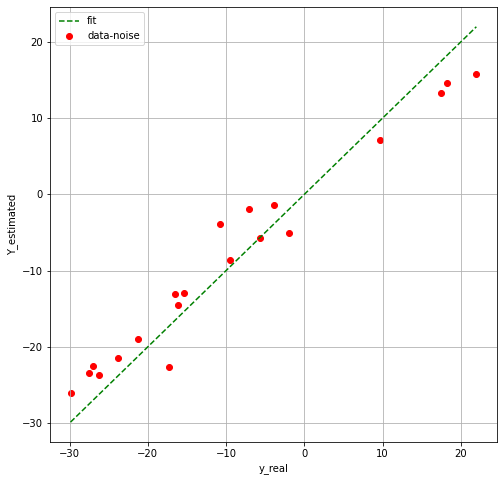

In [10]:
#construir y entrenar el árbol
model = RandomForestRegressor(n_estimators=100,#cuántos árboles queremos
                               criterion='mse', 
                               max_depth=None, #si dejo None puede el árbol ir a su máxima profundidad
                               min_samples_split=2, #cuántos datos se necesitan para que haga un split
                               min_samples_leaf=1, #cuántos datos dejamos en la última hoja
                               max_features='auto', 
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

start_time = time.time()
model = model.fit(X_train,y_train) # prediction with the randomforest
print("--- %s seconds ---" % (time.time() - start_time))
Yhat = model.predict(X_test)
print('R2 = %0.4f'%model.score(X_test,y_test))

plt.figure(figsize=(8,8))
plt.scatter(y_test,Yhat,c='r',label='data-noise')
plt.plot(np.linspace(min(y_test),max(y_test),100),np.linspace(min(y_test),max(y_test),100),'g--',label='fit')
plt.xlabel('y_real')
plt.ylabel('Y_estimated')
plt.grid()
plt.legend()
plt.show()

[Text(166.73571428571427, 206.56799999999998, 'X[2] <= 0.215\nmse = 244.804\nsamples = 51\nvalue = -9.5'),
 Text(79.71428571428571, 184.824, 'X[2] <= -3.612\nmse = 96.949\nsamples = 26\nvalue = -21.706'),
 Text(30.557142857142857, 163.07999999999998, 'X[1] <= -1.744\nmse = 32.012\nsamples = 12\nvalue = -30.889'),
 Text(10.628571428571428, 141.336, 'X[0] <= 0.635\nmse = 2.76\nsamples = 2\nvalue = -19.686'),
 Text(5.314285714285714, 119.592, 'mse = 0.0\nsamples = 1\nvalue = -21.348'),
 Text(15.942857142857143, 119.592, 'mse = 0.0\nsamples = 1\nvalue = -18.025'),
 Text(50.48571428571428, 141.336, 'X[1] <= 2.89\nmse = 18.02\nsamples = 10\nvalue = -32.289'),
 Text(26.57142857142857, 119.592, 'X[0] <= -1.928\nmse = 4.521\nsamples = 6\nvalue = -30.06'),
 Text(21.257142857142856, 97.848, 'mse = 0.0\nsamples = 1\nvalue = -32.902'),
 Text(31.885714285714286, 97.848, 'X[2] <= -6.897\nmse = 3.332\nsamples = 5\nvalue = -29.429'),
 Text(26.57142857142857, 76.10399999999998, 'mse = 0.0\nsamples = 1\n

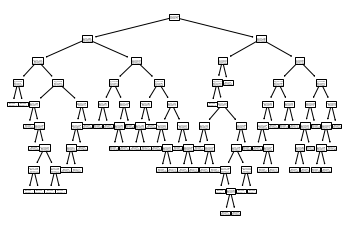

In [11]:
# si yo quisiera ver sólo un árbol
#no se puede imprimir todo el árbol aleatorio
from sklearn import tree
tree.plot_tree(model.estimators_[0]) 

In [12]:
#Buscar un número bueno de árboles a usar
ntrees = np.arange(1,100,5)
R2_s = np.zeros(len(ntrees))
for n in range(len(ntrees)):
    model = RandomForestRegressor(n_estimators=ntrees[n],
                               criterion='mse',
                               max_depth=None,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
    model = model.fit(X_train,y_train)
    R2_s[n] = model.score(X_train,y_train)

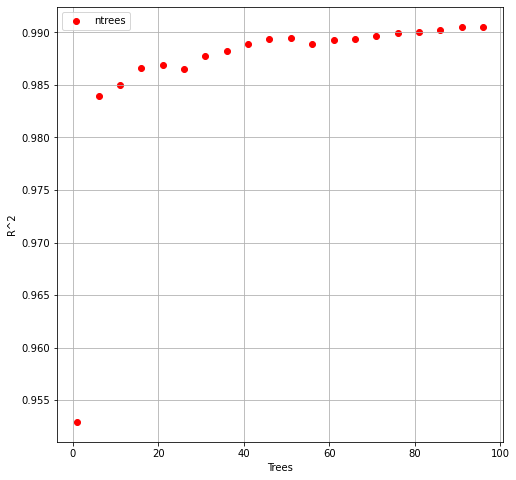

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(ntrees,R2_s,c='r',label='ntrees')
plt.ylabel('R^2')
plt.xlabel('Trees')
plt.grid()
plt.legend()
plt.show()

In [14]:
#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(criterion='mse',
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': range(1,100,10)}, 
                  cv=2,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 91}


In [15]:
#crear modelo usando parámetros óptimos
new_model = RandomForestRegressor(n_estimators=61,
                               criterion='mse',
                               max_depth=7,
                               min_samples_split=10,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
new_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_split=10, n_estimators=61,
                      random_state=0)

In [16]:
from sklearn.metrics import r2_score
yhat = new_model.predict(X_test)
R2_score = r2_score(y_test,yhat)
print('R2:', R2_score)

R2: 0.8851803519144262


In [17]:
from sklearn.metrics import mean_squared_error
MSE_score = mean_squared_error(y_test,yhat)
print('MSE:', MSE_score)

MSE: 27.711947506194115


In [18]:
new_model.feature_importances_

array([0.03767915, 0.09195002, 0.87037083])

**Ventajas**

- Son muy buenos generalizando
- Protejen en contra del sobreajuste (overfitting) gracias a la construcción del bootstrapping 
- También reducen la varianza y por lo tanto mejoran la precisión del modelo
- Funcionan muy bien con variables categóricas y variables continuas
- No se requiere escalamiento previo de variables 
- Manejan muy bien el hecho de que haya datos nulos
- Son modelos robustos ante valores atípicos (outliers)
- Son algoritmos muy estables, cuando hay datos nuevos, el algoritmo no se ve muy afectado. Ya que este nuevo dato puede afectar a un árbol individual, pero es difícil que impacte a todos los árboles. 

**Desventajas**

- Complejidad. Los bosques aleatorios crean muchos árboles y combina sus resultados. Requiere mucho poder computacional y recursos 
- Periodos de entrenamiento largos. Requieren más tiempo de entrenamiento. 